#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Uploading Datasets

In [9]:
data=pd.read_csv("./../compresive_strength_concrete.csv")

In [10]:
data.shape

(1030, 9)

In [11]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [13]:
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [18]:
X_train = data.sample(frac = 0.7, random_state = 123)
X_test = data.drop(X_train.index)

In [8]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


In [40]:
# list1=[0,1,2,3,4,5,6,7,8,9]
# list1 = np.array(list1)
# list1 = list1.reshape(5,2)
# list1[:,0:-1]

In [46]:
# pd.DataFrame(np.random(10,10), columns=[1,2,3,4,5,6,7,8,9,10])
# Y_test.shape

#Assigning features and target variable

In [49]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]

In [50]:
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std

In [51]:
Y_mean = Y_train.mean()
Y_train -= Y_mean
Y_std = Y_train.std()
Y_train /= Y_std
Y_test -= Y_mean
Y_test /= Y_std

In [52]:
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
dtype: object

In [53]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()


#Training and testing data splittion

#Model selection

In [54]:
from tensorflow.keras import layers as layers
from tensorflow.keras import models as model

In [55]:
network = model.Sequential()

In [56]:
network.add(layers.Dense(128,activation="relu",input_shape=(X_train.shape[1],)))

In [57]:
network.add(layers.Dense(64,activation="relu"))

In [58]:
network.add(layers.Dense(32,activation="relu"))

In [59]:
network.add(layers.Dense(1))

In [61]:
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [91]:
history = network.fit(X_train,Y_train,epochs=200,validation_split=0.3, batch_size = 16)

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6471 - mae: 0.4740 - val_loss: 1.0732 - val_mae: 0.6491
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6611 - mae: 0.4769 - val_loss: 1.0917 - val_mae: 0.6529
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6572 - mae: 0.4750 - val_loss: 1.0704 - val_mae: 0.6569
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6533 - mae: 0.4745 - val_loss: 1.1226 - val_mae: 0.6604
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6609 - mae: 0.4716 - val_loss: 1.0570 - val_mae: 0.6497
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6505 - mae: 0.4765 - val_loss: 1.0662 - val_mae: 0.6593
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6683 - mae: 0.4767 - val_loss: 1.0405 - val_mae: 0.6502
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6533 - m

32/32 [==============================] - 0s 3ms/step - loss: 0.6579 - mae: 0.4776 - val_loss: 1.1185 - val_mae: 0.6587
Epoch 64/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6626 - mae: 0.4736 - val_loss: 1.0653 - val_mae: 0.6571
Epoch 65/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6481 - mae: 0.4733 - val_loss: 1.0695 - val_mae: 0.6564
Epoch 66/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6536 - mae: 0.4672 - val_loss: 1.0913 - val_mae: 0.6620
Epoch 67/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6593 - mae: 0.4709 - val_loss: 1.0862 - val_mae: 0.6552
Epoch 68/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6562 - mae: 0.4666 - val_loss: 1.0862 - val_mae: 0.6645
Epoch 69/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6518 - mae: 0.4739 - val_loss: 1.0513 - val_mae: 0.6516
Epoch 70/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6483 - mae: 0

Epoch 125/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6483 - mae: 0.4713 - val_loss: 1.0939 - val_mae: 0.6645
Epoch 126/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6466 - mae: 0.4743 - val_loss: 1.1131 - val_mae: 0.6651
Epoch 127/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6417 - mae: 0.4603 - val_loss: 1.1090 - val_mae: 0.6834
Epoch 128/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6442 - mae: 0.4788 - val_loss: 1.0760 - val_mae: 0.6595
Epoch 129/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6517 - mae: 0.4691 - val_loss: 1.0632 - val_mae: 0.6653
Epoch 130/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6447 - mae: 0.4727 - val_loss: 1.0890 - val_mae: 0.6623
Epoch 131/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6435 - mae: 0.4694 - val_loss: 1.0573 - val_mae: 0.6665
Epoch 132/200
32/32 [==============================] - 0s 3ms/step - 

32/32 [==============================] - 0s 3ms/step - loss: 0.6436 - mae: 0.4703 - val_loss: 1.1156 - val_mae: 0.6914
Epoch 187/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6434 - mae: 0.4672 - val_loss: 1.1667 - val_mae: 0.6734
Epoch 188/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6546 - mae: 0.4700 - val_loss: 1.0923 - val_mae: 0.6766
Epoch 189/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6507 - mae: 0.4679 - val_loss: 1.0856 - val_mae: 0.6640
Epoch 190/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6497 - mae: 0.4730 - val_loss: 1.1297 - val_mae: 0.6739
Epoch 191/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6433 - mae: 0.4660 - val_loss: 1.1579 - val_mae: 0.6826
Epoch 192/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6590 - mae: 0.4766 - val_loss: 1.0932 - val_mae: 0.6645
Epoch 193/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6505 -

In [92]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [93]:
loss,mae=network.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 889us/step - loss: 1.1246 - mae: 0.6472


In [94]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

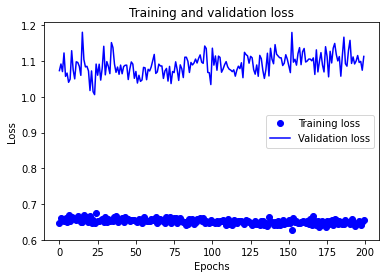

In [95]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(200)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

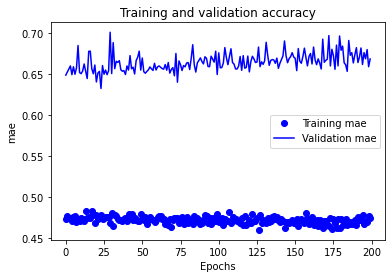

In [96]:
import matplotlib.pyplot as plt 
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [97]:
y_pred = network.predict(X_test)

In [98]:
def denorm(x):
    return (x * Y_std) + Y_mean
    

In [99]:
y_pred = denorm(y_pred)

In [100]:
y_true = denorm(Y_test)

In [101]:
y_pred = y_pred.flatten()

In [102]:
y_pred.shape

(309,)

In [103]:
y_true.shape

(309,)

(0.0, 100.0)

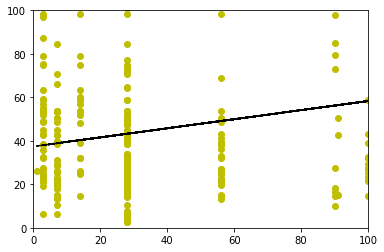

In [104]:
import numpy as np
import matplotlib.pyplot as plt
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)